In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from fancyimpute import KNN

In [10]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
combine_df = train_df.append(test_df,sort=True)

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#upperclass(pclass being 1) more likely to survive? Yes. The survived ratio is .630 for the upper class
train_df[train_df['Pclass'] == 1].Survived.mean()

0.6296296296296297

In [13]:
#women more likely to survive? Yes.The survived ratio is .742 for women.
train_df[train_df['Sex'] == 'female'].Survived.mean()

0.7420382165605095

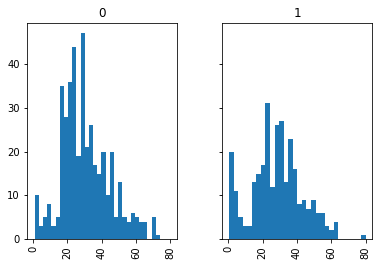

In [6]:
#relationship between age and survival?
age_survival = train_df.hist(column='Age', by='Survived', bins=30, sharey=True, sharex=True)

# for i,x in enumerate(age_survival):

#     # Despine
#     x.spines['right'].set_visible(False)
#     x.spines['top'].set_visible(False)
#     x.spines['left'].set_visible(False)

#     # Switch off ticks
#     x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#     # Draw horizontal axis lines
#     vals = x.get_yticks()
#     for tick in vals:
#         x.axhline(y=tick, alpha=0.4)

#     # Set x-axis label
#     x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

#     # Set y-axis label
#     if i == 0:
#         x.set_ylabel("Frequency", labelpad=50, weight='bold', size=12)

#     # Format y-axis label
#     x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#     x.tick_params(axis='x', rotation=0)

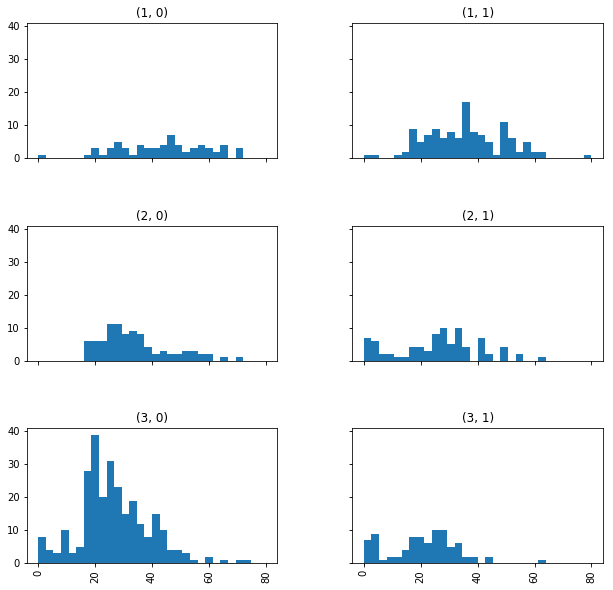

In [7]:
age_Pclass_survival = train_df.hist(column='Age', by=['Pclass','Survived'], layout=(3,2), bins=30, figsize=(10,10), range=(0,80),sharey=True, sharex=True)

In [8]:
# #port of embarkation, sex, fare, survived

# embark_sex_fare_survived = train_df.grouby('Fare').hist(column='Sex', by=['Embarked','Survived'], layout=(3,2), sharey=True, sharex=True)

In [9]:
#duplicates for ticket feature
df=train_df[train_df.duplicated(['Ticket'],keep=False)]
df.sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.00,0,0,110152,86.5000,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.00,0,0,110152,86.5000,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.00,0,0,110152,86.5000,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.00,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.00,0,2,110413,79.6500,E68,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.00,0,0,110465,52.0000,C110,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.00,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.00,0,1,111361,57.9792,B18,C


In [10]:
#how many null values for cabin in combined dataset?
# print(len(combine_df) - combine_df['Cabin'].count())
combine_df['Cabin'].isna().sum()

1014

In [11]:
#turn gender into numeric values
# train_df['Sex'] = train_df['Sex'].replace([1,0],['female','male'])
# train_df.head()

train_df['Sex'] = train_df['Sex'].replace(to_replace=['female', 'male'], value=[1, 0])
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#complete missing values for embark. The most common occurrence is S.
train_df['Embarked'].value_counts()
train_df["Embarked"].fillna("S", inplace = True) 
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [19]:
#complete Fare feature using mode
train_df['Fare'].mode()
train_df["Embarked"].fillna(8.05, inplace = True) 
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [22]:
# binning/bucketing/banding: convert continuous values to ordinal values
bins = [-.001, 7.91, 14.454, 31.0, 512.329]
train_df['FareBand'] = pd.cut(train_df['Fare'], bins)
train_df['OrdinalFareIndicator'] = pd.cut(train_df['Fare'], bins, labels = [0,1,2,3])
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binned,FareBand,OrdinalFareIndicator
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]","(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]","(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]","(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(31.0, 512.329]","(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]","(7.91, 14.454]",1


In [21]:
# use k nearest neighbor to impute missing values of ages

# #We use the train dataframe from Titanic dataset
# #fancy impute removes column names.
# train_cols = list(train_df)
# # Use 5 nearest rows which have a feature to fill in each row's
# # missing features
# train = pd.DataFrame(KNN(k=5).complete(train))
# train.columns = train_cols

df = train_df

# df is my data frame with the missings. I keep only floats. Only age and fare are being used to complete each other.
df_numeric = df.select_dtypes(include=[np.float]).as_matrix()

# I now run fancyimpute KNN, 
# it returns a np.array which I store as a pandas dataframe
df_filled = pd.DataFrame(KNN(3).fit_transform(df_numeric))

df_filled

# df_filled.columns = df_numeric.columns
# df_filled.index = df_numeric.index



Imputing row 1/891 with 0 missing, elapsed time: 0.074
Imputing row 101/891 with 0 missing, elapsed time: 0.075
Imputing row 201/891 with 0 missing, elapsed time: 0.076
Imputing row 301/891 with 1 missing, elapsed time: 0.077
Imputing row 401/891 with 0 missing, elapsed time: 0.078
Imputing row 501/891 with 0 missing, elapsed time: 0.079
Imputing row 601/891 with 0 missing, elapsed time: 0.080
Imputing row 701/891 with 0 missing, elapsed time: 0.080
Imputing row 801/891 with 0 missing, elapsed time: 0.081
<class 'pandas.core.frame.DataFrame'>


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel-5.1.0-py3.7.egg/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,0,1
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
5,21.510474,8.4583
6,54.000000,51.8625
7,2.000000,21.0750
8,27.000000,11.1333
9,14.000000,30.0708
